### Part I. Swiss-roll datase

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [317]:
def plot_swiss_roll(X, y, title):
    """
    Plot the first 2000 points of the swis-roll dataset.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10, edgecolor='k', cmap=plt.cm.get_cmap('Spectral'))
    plt.title(title)
    plt.show()


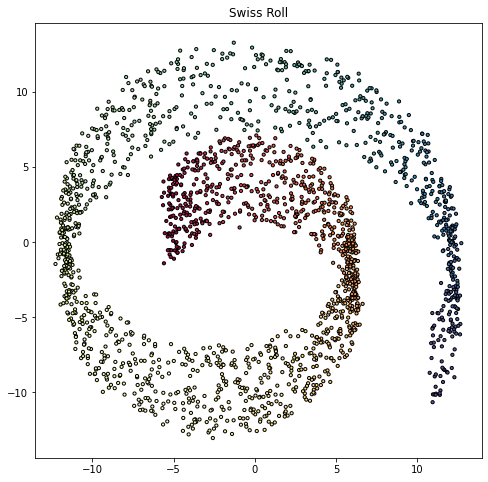

In [318]:
# Generate the swis-roll dataset with 2000 points using the functio datasets.make_swiss_roll
# and plot the first 100 points.

X, y = make_swiss_roll(n_samples=2000, noise=0.2)
plot_swiss_roll(X, y, "Swiss Roll")


In [319]:
def plot(X, y, title):
    """
    Plot the first 2000 points of the swis-roll dataset.
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10, edgecolor='k', cmap=plt.cm.get_cmap('Spectral'))
    plt.title(title)
    plt.show()

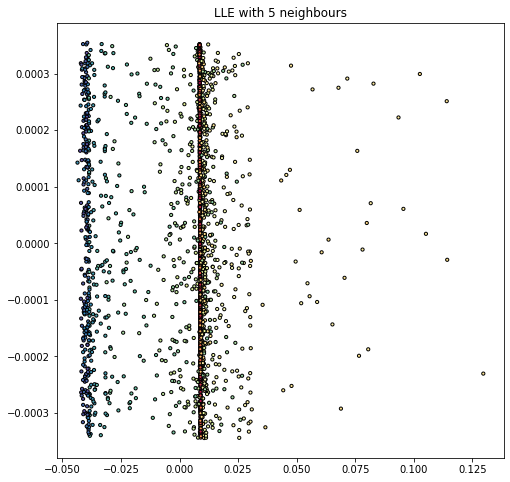

-2.614257285507042e-19


In [320]:
# Apply LLE (Local Linear Embedding) with 5 neighbours by printing the error

lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(X)
plot(X_lle, y, "LLE with 5 neighbours")
print(lle.reconstruction_error_)

In [321]:
# Change the number of neighbours from 2 to 15 and plot the error line. Which is the best number of neighbours ?

error = np.Infinity
best_neighbours = None
for n_neighbors in range(2, 15):
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, eigen_solver='dense')
    X_lle = lle.fit_transform(X)
    if lle.reconstruction_error_ < error:
        error = lle.reconstruction_error_
        best_neighbours = n_neighbors
    print("n_neighbours = {}: Reconstruction error = {}".format(n_neighbors, lle.reconstruction_error_))

print("The best number of neighbors is {}.".format(best_neighbours))

n_neighbours = 2: Reconstruction error = 8.23842530812569e-15
n_neighbours = 3: Reconstruction error = 6.356246253798931e-16
n_neighbours = 4: Reconstruction error = -2.3089724903505505e-15
n_neighbours = 5: Reconstruction error = 2.0922544906242776e-12
n_neighbours = 6: Reconstruction error = 2.3015853966242467e-10
n_neighbours = 7: Reconstruction error = 6.404940845046321e-10
n_neighbours = 8: Reconstruction error = 2.9842127904245e-09
n_neighbours = 9: Reconstruction error = 2.9575726465757355e-09
n_neighbours = 10: Reconstruction error = 2.5432162402195784e-09
n_neighbours = 11: Reconstruction error = 9.775318868539103e-09
n_neighbours = 12: Reconstruction error = 1.9084350266364548e-08
n_neighbours = 13: Reconstruction error = 1.8848002915672446e-08
n_neighbours = 14: Reconstruction error = 2.5047259015648757e-08
The best number of neighbors is 4.


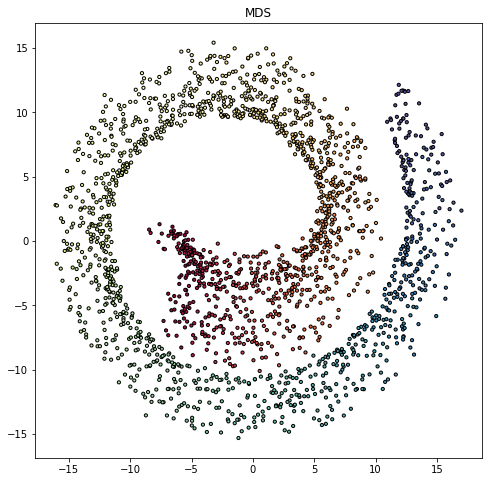

In [322]:
# Use Multi Dimensional Scaling with manifold.MDS and visualize the dataset in 2 dimension

mds = MDS(n_components=2, max_iter=100, n_init=1)
X_mds = mds.fit_transform(X)
plot(X_mds, y, "MDS")

/home/ion/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ion/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


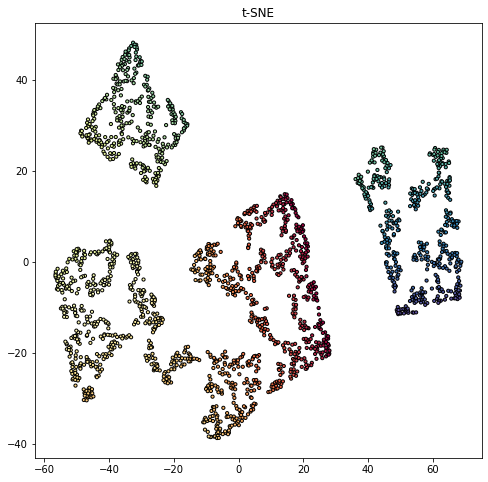

In [323]:
# Apply t-SNE model to the same dataset with manifold.TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot(X_tsne, y, "t-SNE")

The best model is t-SNE because it could group the data into two dimensions and create clusters that contains pointsof the same color. Even if we reexecute the code, there will be other clusters  that may collide, but the model will always be able to create distiguishable clusters. With MDS the are no clusters but the model could create a spiral and separated the red points from the blue points.

### Part II. Digit dataset

In [324]:
def plot_digits(X, y, title):
    """
    Plot the first 100 digits of the dataset.
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(np.reshape(X[0], (8, 8)), cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

In [325]:
# Import the digit dataset containing only 6 classes

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape


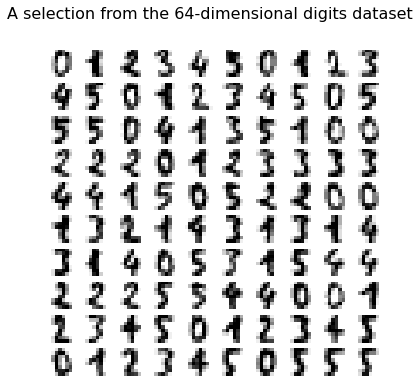

In [326]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [329]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")


In [340]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian", eigen_solver="dense"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [341]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...


/home/ion/.local/lib/python3.9/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:936: LinAlgWarning: Diagonal number 350 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


/home/ion/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing NCA embedding...


/home/ion/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/ion/.local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


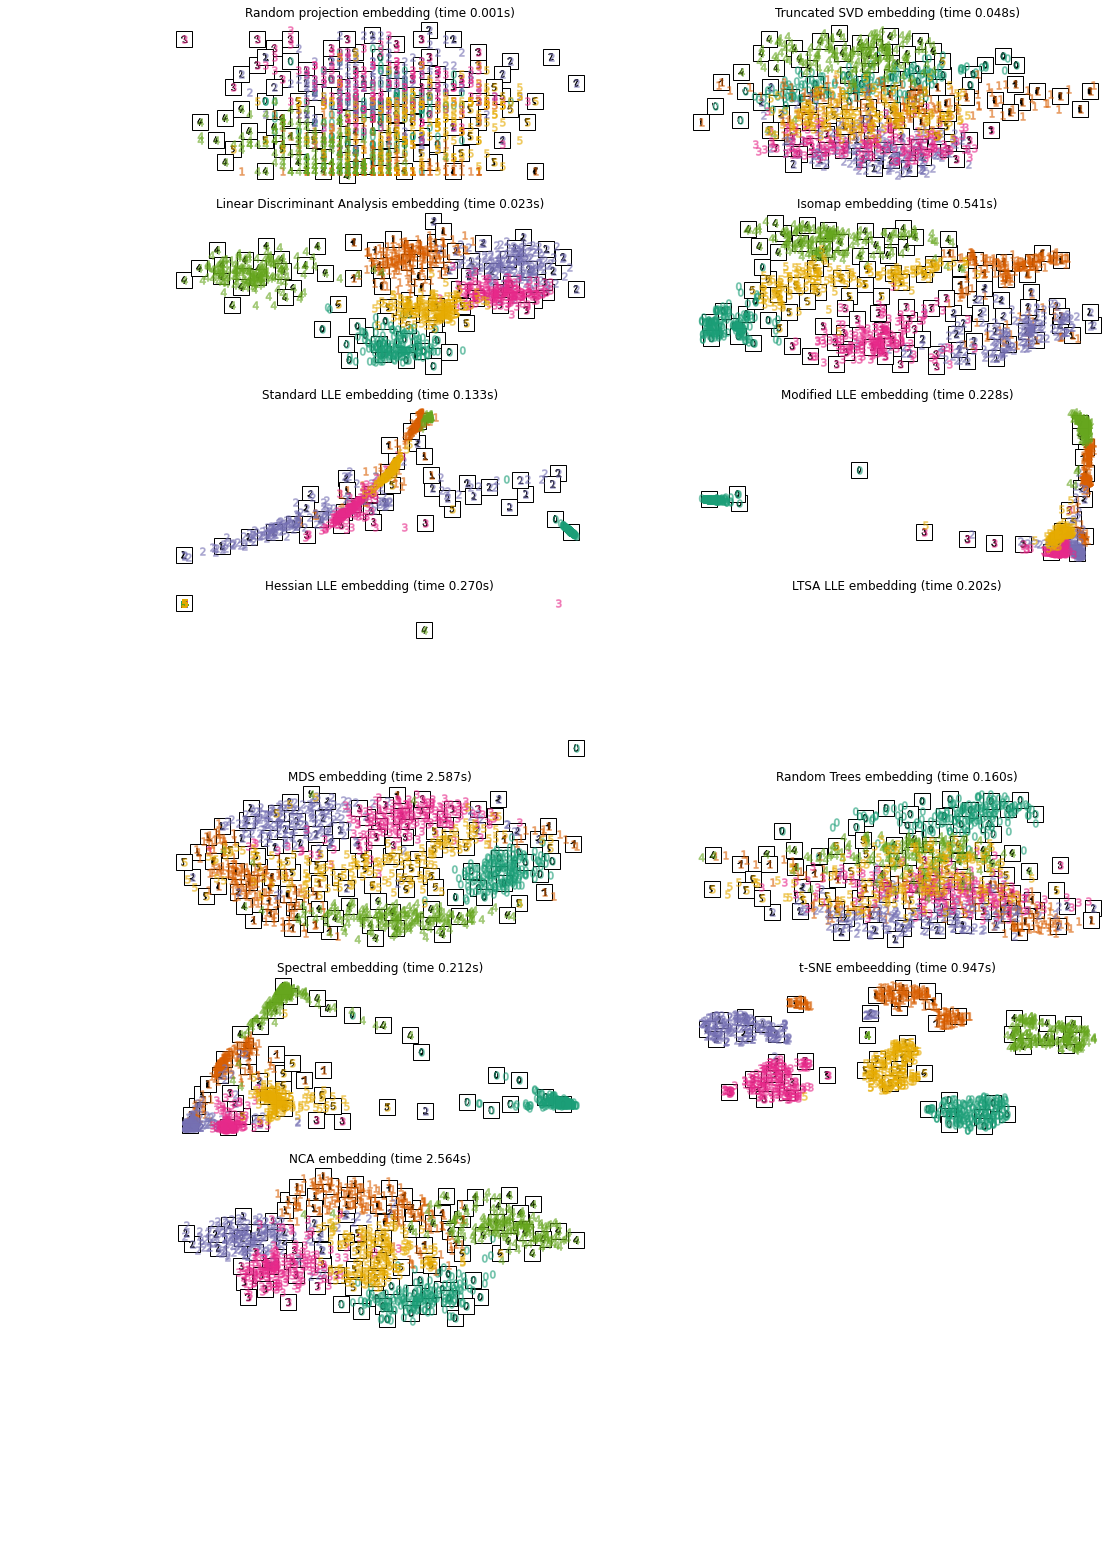

In [342]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()